In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
Adult_sal=pd.read_csv('C:Desktop/adult.csv')

In [3]:
Adult_sal.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#Understanding the variables

In [5]:
Adult_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#Understanding Numerical columns

In [7]:
Num_sal=Adult_sal.select_dtypes(['int64'])

In [8]:
Num_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educational-num  48842 non-null  int64
 3   capital-gain     48842 non-null  int64
 4   capital-loss     48842 non-null  int64
 5   hours-per-week   48842 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


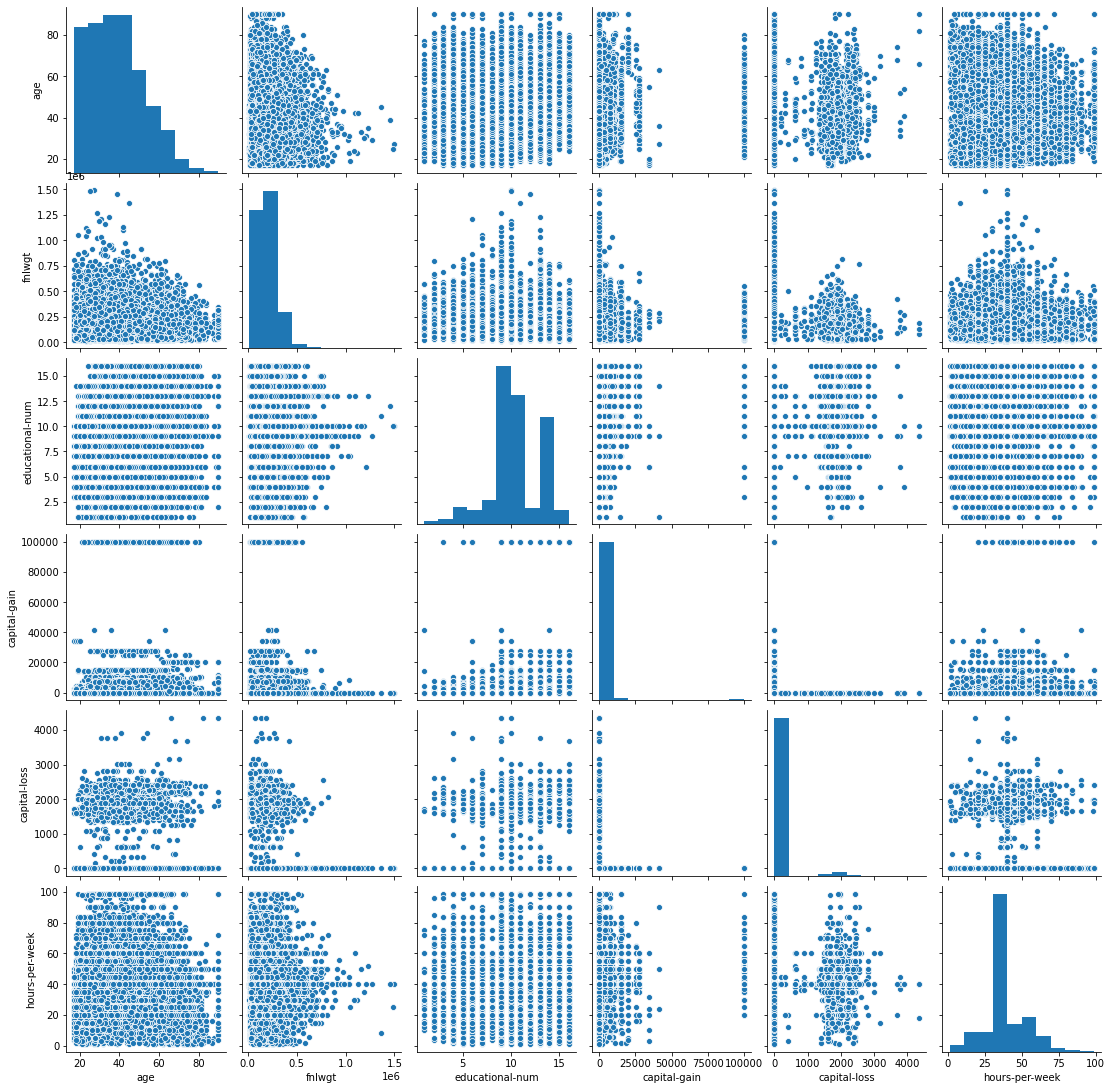

In [9]:
sns.pairplot(Num_sal)

In [10]:
#We would drop the column fnlwght as that seems to be insignificant

In [11]:
Num_sal.drop(columns=['fnlwgt'],axis=1,inplace=True)

In [12]:
#Renaming the columns based on our convenience

In [13]:
Num_sal.rename(columns={'educational-num':'Edn','capital-gain':'capgain','capital-loss':'Caploss','hours-per-week':'hrspw'},inplace=True)

In [14]:
Num_sal.describe()

,age,Edn,capgain,Caploss,hrspw
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
#Handling Categorical variables

In [16]:
Cat_sal=Adult_sal.select_dtypes(['object'])

In [17]:
Cat_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       48842 non-null  object
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   native-country  48842 non-null  object
 8   income          48842 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [18]:
Cat_sal.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [19]:
#Checking on the Dependent variable income

In [20]:
Cat_sal.income.value_counts()/Cat_sal.shape[0]*100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

In [21]:
# We will convert these into numerical variables. <=50K=0 & >50K =1

In [22]:
Cat_sal['income']=Cat_sal['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [23]:
Cat_sal.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0


In [24]:
#Checking the value_counts of the native-country

In [25]:
Cat_sal['native-country'].value_counts()/Cat_sal.shape[0]*100

United-States                 89.742435
Mexico                         1.947095
?                              1.754637
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                           0.120798


In [26]:
#We will drop the this variable as close to 90% is taken by US & the rest of the countries hardly make up the rest.
#This will cause unnecessary bias & hence dropping this variable. 

In [27]:
Cat_sal.drop(columns=['native-country'],axis=1,inplace=True)

In [28]:
#Checking the dataset again after dropping

In [29]:
Cat_sal.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,?,Some-college,Never-married,?,Own-child,White,Female,0


In [30]:
#There seems to be "?" values in the dataset. We will replace them with 'Nan' values & then by the "mode"

In [31]:
Cat_sal.isin(['?']).sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
income               0
dtype: int64

In [32]:
Cat_sal['workclass']=Cat_sal['workclass'].replace('?',np.nan)

In [33]:
Cat_sal['occupation']=Cat_sal['occupation'].replace('?',np.nan)

In [34]:
#Checking the replaced nan values

In [35]:
Cat_sal.isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
income               0
dtype: int64

In [36]:
#Replacing with nan values with mode

In [37]:
Cat_sal['workclass']=Cat_sal['workclass'].fillna('Private').astype(str)

In [38]:
Cat_sal['occupation']=Cat_sal['occupation'].fillna(Cat_sal['occupation'].mode()).astype(str)

In [39]:
#Checking the dataset again to verify

In [40]:
Cat_sal.isna().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
income            0
dtype: int64

In [41]:
#Seems okay. We will check the Categorical columns one by one. 

In [42]:
#Lets check the dataset again. 

In [43]:
Cat_sal.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,Private,Some-college,Never-married,nan,Own-child,White,Female,0


In [44]:
# Looks like the nan values are still existant in our dataset. We will try to replace it by mode

In [45]:
Cat_sal['workclass'].mode()

0    Private
dtype: object

In [46]:
#We will replace the 'nan' values in workclass by 'Private' as that happens to be mode

In [47]:
Cat_sal['workclass']=Cat_sal['workclass'].replace('nan','Private')

In [48]:
Cat_sal['occupation'].mode()

0    Prof-specialty
dtype: object

In [49]:
#We will replace the 'nan' values in occupation by 'prof-specialty' as that happens to be mode

In [50]:
Cat_sal['occupation']=Cat_sal['occupation'].replace('nan','Prof-specialty')

In [51]:
#Checking the dataset again

In [52]:
Cat_sal

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


In [53]:
#Seems everything is okay.Now, we will try to work from column to column

In [54]:
Cat_sal.workclass.value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [55]:
Cat_sal.workclass.value_counts()/Cat_sal.shape[0]*100

Private             75.150485
Self-emp-not-inc     7.907129
Local-gov            6.420703
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

In [56]:
#As there are many variables in this class, we will try to bin it in 3 categories as follows
#1)Private 
#2)Govt - Local-gov, State-gov,Federal-gov
#3)Others - Self-emp-not-inc,Without-pay,Never-worked,Self-emp-inc


In [57]:
dict1_work={'Local-gov':'Govt','State-gov':'Govt','Federal-gov':'Govt','Self-emp-inc':'Others','Self-emp-not-inc':'Others','Without-pay':'Others','Never-worked':'Others','Private':'Private'}

In [58]:
Cat_sal['workclass']=Cat_sal['workclass'].map(dict1_work)

In [59]:
Cat_sal

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Govt,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


In [60]:
Cat_sal.workclass.value_counts()

Private    36705
Govt        6549
Others      5588
Name: workclass, dtype: int64

In [61]:
#Lets create a copy of this Cat_Sal as Cate_sal & use that for further use

In [62]:
Cate_sal=Cat_sal.copy()

In [63]:
#Lets do one hot encoding for the workclass variable

In [64]:
pd.get_dummies(Cate_sal.workclass,drop_first=True)

,Others,Private
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
48837,0,1
48838,0,1
48839,0,1
48840,0,1


In [65]:
#Concatanating dummy & original data

In [66]:
work_dummy=pd.get_dummies(Cate_sal.workclass,drop_first=True,prefix='work')

In [67]:
Cate_sal=pd.concat([Cate_sal,work_dummy],axis=1)

In [68]:
Cate_sal.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income,work_Others,work_Private
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,1
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,1
2,Govt,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1,0,0
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1,0,1
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,1


In [69]:
#Dropping the column 'Workclass' as we have created dummy variables for this variable

In [70]:
Cate_sal.drop(columns=['workclass'],axis=1,inplace=True)

In [71]:
Cate_sal.head(3)

,education,marital-status,occupation,relationship,race,gender,income,work_Others,work_Private
0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,1
1,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,1
2,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1,0,0


In [72]:
#Lets work on the categorical variable Education

In [73]:
Cate_sal.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [74]:
Cate_sal.education.value_counts()/Cate_sal.shape[0]*100

HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: education, dtype: float64

In [75]:
#Again, here as there are too many varaiables, we will bin them into 9 categories as below. 
#High School - {HS-grad } - 2
#College-{Some-college} -3
#Bachelors - {Bachelors}-4
#Masters -{Masters}-5
#Doctorate-{Doctorate}-6
#Assoc-voc-{Assoc-voc}-7
#Assoc-acdm - {Assoc-acdm} -8
#Prof-school-{prof-school}-9
#Others - {11th,10th,7th-8th,9th,12th,5th-6th,1st-4th,Preschool} -1 ( As its preschool, we have given least rank-1)

In [76]:
dict2_ed={'HS-grad':'Highschool','Some-college':'College','Bachelors':'Bachelors','Masters':'Masters',
          'Doctorate':'Doctorate','Assoc-voc':'Assoc-voc','Assoc-acdm':'Assoc-acdm','Prof-school':'Prof-school',
           '11th':'Others','10th':'Others','7th-8th':'Others','9th':'Others','12th':'Others','5th-6th':'Others',
           '1st-4th':'Others','Preschool':'Others'}

In [77]:
Cate_sal['education']=Cate_sal['education'].map(dict2_ed)

In [78]:
Cate_sal['education'].value_counts()

Highschool     15784
College        10878
Bachelors       8025
Others          6408
Masters         2657
Assoc-voc       2061
Assoc-acdm      1601
Prof-school      834
Doctorate        594
Name: education, dtype: int64

In [79]:
#Now, converting these into numerical variables as based on the education. Higher the education, higher the grade

In [80]:
dict22_ed={'Others':1,'Highschool':2,'College':3,'Bachelors':4,'Masters':5,'Doctorate':6,'Assoc-voc':7,'Assoc-acdm':8,
           'Prof-school':9}

In [81]:
Cate_sal['education']=Cate_sal['education'].map(dict22_ed)

In [82]:
#Viewing the dataset again with the transformation of Education column

In [83]:
Cate_sal.head(3)

,education,marital-status,occupation,relationship,race,gender,income,work_Others,work_Private
0,1,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,1
1,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,1
2,8,Married-civ-spouse,Protective-serv,Husband,White,Male,1,0,0


In [84]:
#Working on the column 'Marital Status'

In [85]:
Cate_sal['marital-status'].value_counts()/Cate_sal.shape[0]*100

Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-absent     1.285779
Married-AF-spouse         0.075754
Name: marital-status, dtype: float64

In [86]:
#Again, we will bin these categories as per the below 
#Married - {Married-civ-spouse,Married-spouse-absent,Married-AF-spouse} - 0
#Single -{Never-married,Divorced,Separated,Widowed} -1

In [87]:
dict3_marital={'Married-civ-spouse':'Married','Married-spouse-absent':'Married','Married-AF-spouse':'Married',
               'Never-married':'Single','Divorced':'Single','Separated':'Single','Widowed':'Single'}

In [88]:
Cate_sal['marital']=Cate_sal['marital-status'].map(dict3_marital)

In [89]:
Cate_sal['marital'].value_counts()

Single     25798
Married    23044
Name: marital, dtype: int64

In [90]:
#Converting these into numerical variables - Married - 1 & Single - 0

In [91]:
Cate_sal['marital']=Cate_sal['marital'].map({'Single':0,'Married':1})

In [92]:
#Removing the column 'marital status' as we have transformed them into dummy variables

In [93]:
Cate_sal.drop(columns=['marital-status'],axis=1,inplace=True)

In [94]:
#Viewing the dataset after transformation

In [95]:
Cate_sal.head(3)

,education,occupation,relationship,race,gender,income,work_Others,work_Private,marital
0,1,Machine-op-inspct,Own-child,Black,Male,0,0,1,0
1,2,Farming-fishing,Husband,White,Male,0,0,1,1
2,8,Protective-serv,Husband,White,Male,1,0,0,1


In [96]:
#Viewing the Occupation column for the transformation

In [97]:
Cate_sal.occupation.value_counts()/Cate_sal.shape[0]*100

Prof-specialty       18.387863
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: occupation, dtype: float64

In [98]:
#As there are too many categories, we would bin & encode the categories as per below. 

#Others - {Other-service,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,
#            Protective-serv ,Priv-house-serv,Armed-Forces} - 1

#Prof-specialty- 2
#Craft-repair-3
#Exec-managerial -4
#Adm-clerical -5
#Sales -6


In [99]:
dict4_occ={'Other-service':1,'Machine-op-inspct':1,'Transport-moving':1,'Handlers-cleaners':1,
           'Farming-fishing':1,'Tech-support':1,'Protective-serv':1,'Priv-house-serv':1,'Armed-Forces':1,
          
           'Prof-specialty':2,'Craft-repair':3,'Exec-managerial':4,'Adm-clerical':5,'Sales':6}

In [100]:
Cate_sal['Occpn']=Cate_sal['occupation'].map(dict4_occ)

In [101]:
#Removing the 'Occupation' coloumn from the oroginal dataset as we have transformed the features

In [102]:
Cate_sal.drop(columns=['occupation'],axis=1,inplace=True)

In [103]:
#Viewing the dataset

In [104]:
Cate_sal.head()

,education,relationship,race,gender,income,work_Others,work_Private,marital,Occpn
0,1,Own-child,Black,Male,0,0,1,0,1
1,2,Husband,White,Male,0,0,1,1,1
2,8,Husband,White,Male,1,0,0,1,1
3,3,Husband,Black,Male,1,0,1,1,1
4,3,Own-child,White,Female,0,0,1,0,2


In [105]:
#Lets work on the Categorical column relationship

In [106]:
Cate_sal.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [107]:
#We will remove this column as this seems quite redundant to the already transformed column 'Marital Status'

In [108]:
Cate_sal.drop(columns=['relationship'],axis=1,inplace=True)

In [109]:
#Viewing the dataset

In [110]:
Cate_sal.head()

,education,race,gender,income,work_Others,work_Private,marital,Occpn
0,1,Black,Male,0,0,1,0,1
1,2,White,Male,0,0,1,1,1
2,8,White,Male,1,0,0,1,1
3,3,Black,Male,1,0,1,1,1
4,3,White,Female,0,0,1,0,2


In [111]:
#Lets work on the race column

In [112]:
Cate_sal.race.value_counts()/Cate_sal.shape[0]*100

White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: race, dtype: float64

In [113]:
#We will again bin & encode this into 3 categories as follows

#White - 1
#Black - 2
#Others -{Asian-Pac-Islander,Amer-Indian-Eskimo,Other} - 3 

In [114]:
dict5_race={'White':1,'Black':2,'Asian-Pac-Islander':3,'Amer-Indian-Eskimo':3,'Other':3}

In [115]:
Cate_sal['Race']=Cate_sal['race'].map(dict5_race)

In [116]:
#Dropping the original race variable

In [117]:
Cate_sal.drop(columns=['race'],axis=1,inplace=True)

In [118]:
#Working on the gender column as follows

#Male - 1
#Female - 0

In [119]:
Cate_sal['Gen']=Cate_sal['gender'].map({'Male':1,'Female':2}).astype(int)

In [120]:
Cate_sal.Gen.value_counts()

1    32650
2    16192
Name: Gen, dtype: int64

In [121]:
#Removing the orinal column gender as we have transformed them using dummy variables

In [122]:
Cate_sal.drop(columns=['gender'],axis=1,inplace=True)

In [123]:
#Viewing the complete categorical dataset

In [124]:
Cate_sal.head()

,education,income,work_Others,work_Private,marital,Occpn,Race,Gen
0,1,0,0,1,0,1,2,1
1,2,0,0,1,1,1,1,1
2,8,1,0,0,1,1,1,1
3,3,1,0,1,1,1,2,1
4,3,0,0,1,0,2,1,2


In [125]:
#Now, combining Numerical & Categorical Dataset to get the Final Dataset

In [126]:
Final_Salary=pd.concat([Num_sal,Cate_sal],axis=1)

In [127]:
Final_Salary.head()

,age,Edn,capgain,Caploss,hrspw,education,income,work_Others,work_Private,marital,Occpn,Race,Gen
0,25,7,0,0,40,1,0,0,1,0,1,2,1
1,38,9,0,0,50,2,0,0,1,1,1,1,1
2,28,12,0,0,40,8,1,0,0,1,1,1,1
3,44,10,7688,0,40,3,1,0,1,1,1,2,1
4,18,10,0,0,30,3,0,0,1,0,2,1,2


In [128]:
#Dividing the dataset into X& Y

In [129]:
X=Final_Salary.drop(columns=['income'],axis=1)

In [130]:
Y=Final_Salary['income']

In [131]:
#Scaling the X dataset

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler=StandardScaler()

In [134]:
X_scaled=scaler.fit_transform(X)

In [135]:
#Dividing this into train & test

In [136]:
trainX,testX,trainY,testY=train_test_split(X_scaled,Y,test_size=.3,random_state=454)

In [137]:
import xgboost
from xgboost import XGBClassifier

In [138]:
XGB=XGBClassifier()

In [139]:
XGB.fit(trainX,trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,classification_report

In [141]:
#Training accuracy

In [142]:
accuracy_score(trainY,XGB.predict(trainX))

0.8854894849220509

In [143]:
#Confusion Matrix for Training Dataset

In [144]:
confusion_matrix(trainY,XGB.predict(trainX))

array([[24780,  1187],
       [ 2728,  5494]], dtype=int64)

In [145]:
#F1score for the Training Dataset

In [146]:
f1_score(trainY,XGB.predict(trainX))

0.7373012145205663

In [147]:
#Calculating the ROC-AUC score for the training Dataset

In [148]:
roc_auc_score(trainY,XGB.predict(trainX))

0.8112476918925324

In [149]:
#Classification Report for the Training Dataset

In [150]:
print(classification_report(trainY,XGB.predict(trainX)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     25967
           1       0.82      0.67      0.74      8222

    accuracy                           0.89     34189
   macro avg       0.86      0.81      0.83     34189
weighted avg       0.88      0.89      0.88     34189



In [151]:
#Calculating Testing Accuracy

In [152]:
accuracy_score(testY,XGB.predict(testX))

0.8680816215109534

In [153]:
#We seem to have a very good accuracy with respect to Training Data & Testing Data. 

In [154]:
#Confusion Matrix for the Testing Dataset

In [155]:
confusion_matrix(testY,XGB.predict(testX))

array([[10569,   619],
       [ 1314,  2151]], dtype=int64)

In [156]:
#F1 score for the Testing Dataset

In [157]:
f1_score(testY,XGB.predict(testX))

0.6899759422614274

In [158]:
#Again, we dont see any significant difference in the F1 scores of Testing & Training dataset.

In [159]:
#Testing of ROC-AUC score for the Testing Dataset

In [160]:
roc_auc_score(testY,XGB.predict(testX))

0.7827260422809226

In [161]:
#Classification report for the Testing Dataset

In [162]:
print(classification_report(testY,XGB.predict(testX)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11188
           1       0.78      0.62      0.69      3465

    accuracy                           0.87     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653



In [163]:
#Though this model seems quite stable & looks pretty good for the model building, we will try to hypertune this model using GridSearchcv

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
param_grid={'learning_rate':[1,0.5,0.1,0.01],'max_depth': [3,5,10],'n_estimators':[50,100,150]}

In [166]:
Hyper_grid=GridSearchCV(XGBClassifier(),param_grid=param_grid,cv=5)

In [167]:
Hyper_grid.fit(trainX,trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [168]:
Hyper_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [169]:
#Checking the training accuracy with the Hypertuned model

In [170]:
accuracy_score(trainY,Hyper_grid.predict(trainX))

0.8742870513907982

In [171]:
#Checking the testing accuracy of the Hypertuned model

In [172]:
accuracy_score(testY,Hyper_grid.predict(testX))

0.8695147751313724

In [173]:
#We dont see a significant difference between the Hypertuned model & base model of XGBOOST. 
#Hence we will go with the base model. 

In [174]:
#We will store the base model in pickle file for the deployment

In [184]:
import pickle

In [185]:
with open('xgboost.pickle','wb') as filename:
    pickle.dump(XGB,filename)

In [186]:
with open('xgboost.pickle','rb') as filename:
    Model=pickle.load(filename)

In [187]:
with open('Scaler.pickle','wb')as f:
    pickle.dump(scaler,f)

In [188]:
with open('Scaler.pickle','rb') as f:
    Scaler=pickle.load(f)

In [189]:
l=X.loc[0,:].tolist()

In [190]:
l

[25, 7, 0, 0, 40, 1, 0, 1, 0, 1, 2, 1]

In [191]:
Model.predict(Scaler.transform([l]))[0]

0

In [192]:
X.head(2)

,age,Edn,capgain,Caploss,hrspw,education,work_Others,work_Private,marital,Occpn,Race,Gen
0,25,7,0,0,40,1,0,1,0,1,2,1
1,38,9,0,0,50,2,0,1,1,1,1,1


In [193]:
#Working in python

In [186]:
h=[]
    
for col in X.columns:
            
    print('Enter',col)
              
    j=int(input())
               
    h.append(j)
    
print(h,'\n')

print('Model Prediction is as below','\n')

if Model.predict(Scaler.transform([h]))[0]==0:
    
    print('PREDICTION -SALARY is GREATER THAN 50K')
    
    
else:
    
    print('PREDICTION-SALARY is LESS than 50K')


    
    

Enter age
30
Enter Edn
3
Enter capgain
5
Enter Caploss
5
Enter hrspw
6
Enter education
6
Enter work_Others
4
Enter work_Private
3
Enter marital
1
Enter Occpn
3
Enter Race
1
Enter Gen
1
[30, 3, 5, 5, 6, 6, 4, 3, 1, 3, 1, 1] 

Model Prediction is as below 

PREDICTION -SALARY is GREATER THAN 50K


In [178]:
file='xgboost.pickle'

Scaler='Scaler.pickle'

model=pickle.load(open(file,'rb'))
scaler=pickle.load(open(Scaler,'rb'))

print('Enter age')
age=int(input())
print('Enter Ednum')
Ednum=int(input())
print('Enter cg')
CG=int(input())
print('Enter CL')
CL=int(input())
print('hours')
hours=int(input())
print('Enter Ed')
Ed=int(input())
print('Enter WO')
WO=int(input())
print('Enter WP')
WP=int(input())
print('Enter Marital Status')
Marital=int(input())
print('Enter Occupation')
Occ=int(input())
print('Enter Race')
Race=int(input())
print('Enter Gender')
gender=int(input())


prediction=model.predict(scaler.transform([[age,Ednum,CG,CL,hours,Ed,WO,WP,Marital,Occ,Race,gender]]))[0]

print('Prediction Value',prediction)

if prediction==0:

    print('SALARY is ABOVE 50K')

else:
    
    print('SALARY IS LESS THAN 50K')

Enter age
25
Enter Ednum
3
Enter cg
40000
Enter CL
3999
hours
34
Enter Ed
3
Enter WO
2
Enter WP
3
Enter Marital Status
1
Enter Occupation
2
Enter Race
1
Enter Gender
3
Prediction Value 0
SALARY is ABOVE 50K
